In [7]:
import os
from tifffile import TiffFile
import numpy as np
import matplotlib.pyplot as plt


In [5]:
data_dir = '../platelet_data'

In [11]:
with TiffFile(os.path.join(data_dir, 'train-images.tif')) as tif:
    train_img = tif.asarray()
    
with TiffFile(os.path.join(data_dir, 'train-labels.tif')) as tif:
    train_label = tif.asarray()
    
with TiffFile(os.path.join(data_dir, 'eval-images.tif')) as tif:
    eval_img = tif.asarray()
    
with TiffFile(os.path.join(data_dir, 'eval-labels.tif')) as tif:
    eval_label = tif.asarray()
    
with TiffFile(os.path.join(data_dir, 'test-images.tif')) as tif:
    test_img = tif.asarray()
    
with TiffFile(os.path.join(data_dir, 'test-labels.tif')) as tif:
    test_label = tif.asarray()
    
print(train_img.shape, train_label.shape)
print(eval_img.shape, eval_label.shape)
print(test_img.shape, test_label.shape)

(50, 800, 800) (50, 800, 800)
(24, 800, 800) (24, 800, 800)
(121, 609, 400) (121, 609, 400)


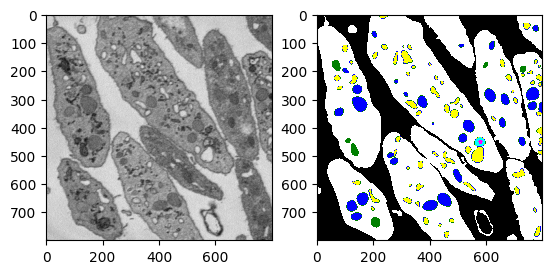

In [26]:
from matplotlib.colors import ListedColormap

label_cmap = ListedColormap(['black', 'white', 'green', 'blue', 'yellow', 'cyan', 'magenta'])

plt.subplot(121)
plt.imshow(train_img[0], cmap='gray')
plt.subplot(122)
plt.imshow(train_label[0], cmap=label_cmap)

In [18]:
np.unique(train_label)

array([0, 1, 2, 3, 4, 5, 6], dtype=uint16)

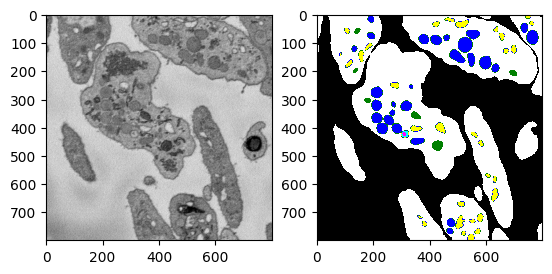

In [30]:
plt.subplot(121)
plt.imshow(eval_img[0], cmap='gray')
plt.subplot(122)
plt.imshow(eval_label[0], cmap=label_cmap)

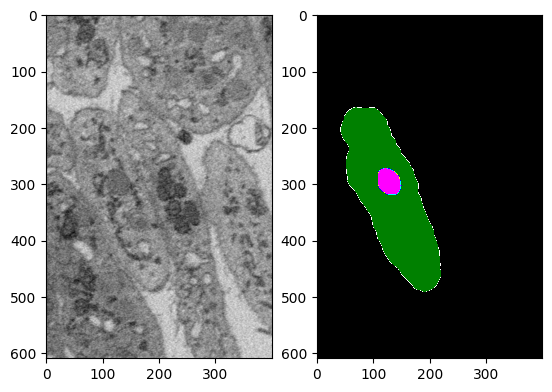

In [29]:
plt.subplot(121)
plt.imshow(test_img[20], cmap='gray')
plt.subplot(122)
plt.imshow(test_label[20], cmap=label_cmap)

In [20]:
np.unique(test_label)

array([0, 1, 2, 3, 4, 5, 6], dtype=uint16)

In [31]:
import segmentation_models_pytorch as smp

model = smp.Unet(
    encoder_name="resnet34",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=1,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=7,                      # model output channels (number of classes in your dataset)
)

/Users/imyu/anaconda3/envs/seg/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/imyu/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 23.3MB/s]
